In [13]:
import pandas as pd

df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(df.shape)
df

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)


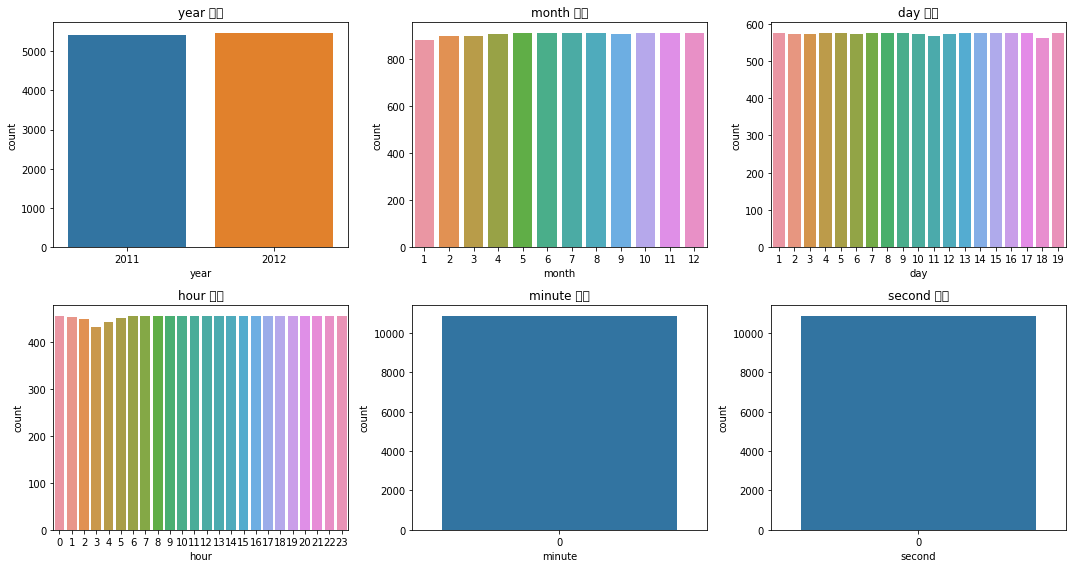

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # 2차원 배열을 1차원으로 변환

# 시간 요소 리스트
time_elements = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 각 시간 요소에 대한 그래프 생성
for i, col in enumerate(time_elements):
    # countplot 생성
    sns.countplot(x=col, data=df, ax=axes[i])
    
    # 그래프 제목 설정
    axes[i].set_title(f'{col} 분포')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

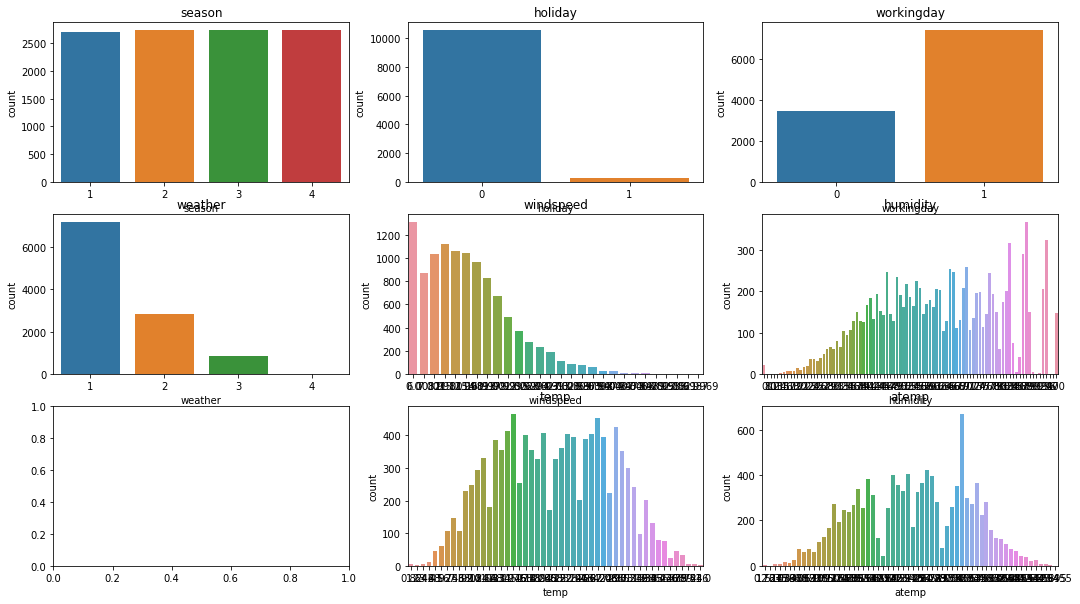

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
sns.countplot(data=df, x='season', ax=axes[0, 0])
axes[0, 0].set_title('season')
sns.countplot(data=df, x='holiday', ax=axes[0, 1])
axes[0, 1].set_title('holiday')
sns.countplot(data=df, x='workingday', ax=axes[0, 2])
axes[0, 2].set_title('workingday')
sns.countplot(data=df, x='weather', ax=axes[1, 0])
axes[1, 0].set_title('weather')
sns.countplot(data=df, x='windspeed', ax=axes[1, 1])
axes[1, 1].set_title('windspeed')
sns.countplot(data=df, x='humidity', ax=axes[1, 2])
axes[1, 2].set_title('humidity')
sns.countplot(data=df, x='temp', ax=axes[2, 1])
axes[2, 1].set_title('temp')
sns.countplot(data=df, x='atemp', ax=axes[2, 2])
axes[2, 2].set_title('atemp')

plt.show()

In [19]:
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns

corr = df[numeric_cols].corr()['count'].drop('count')

print(corr.sort_values(ascending=False))

registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
minute             NaN
second             NaN
Name: count, dtype: float64


In [20]:
features = ['hour', 'temp', 'year', 'month', 'season', 'windspeed', 'weather', 'humidity']
target = ['count']

X = df[features]
y = df[target]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

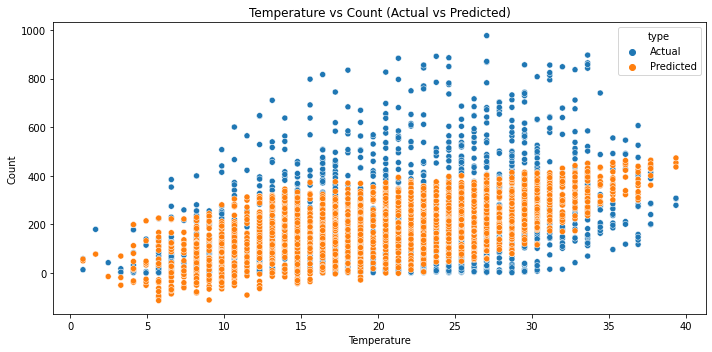

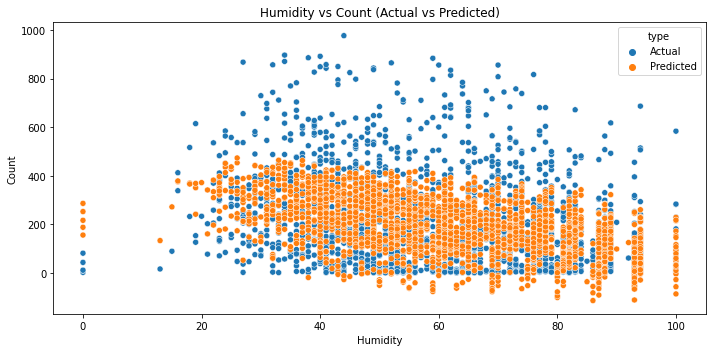

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# temp 기준 그래프
df_temp = pd.DataFrame({
    'temp': X_test['temp'],
    'count': y_test.values.ravel(),
    'type': 'Actual'
})
df_temp_pred = pd.DataFrame({
    'temp': X_test['temp'],
    'count': y_pred.ravel(),
    'type': 'Predicted'
})
df_temp_all = pd.concat([df_temp, df_temp_pred])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_temp_all, x='temp', y='count', hue='type')
plt.title('Temperature vs Count (Actual vs Predicted)')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# humidity 기준 그래프
df_humidity = pd.DataFrame({
    'humidity': X_test['humidity'],
    'count': y_test.values.ravel(),
    'type': 'Actual'
})
df_humidity_pred = pd.DataFrame({
    'humidity': X_test['humidity'],
    'count': y_pred.ravel(),
    'type': 'Predicted'
})
df_humidity_all = pd.concat([df_humidity, df_humidity_pred])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_humidity_all, x='humidity', y='count', hue='type')
plt.title('Humidity vs Count (Actual vs Predicted)')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()